# Building a model to improve Zestimate residual error
### Machine Learning Nano Degree Capstone Project
### Lei Pan Nov 14th, 2017



## Explore the dataset

### Import the Dataset

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plot
import seaborn as sns
#import training dataset
train_data = pd.read_csv('dataset/train_2016.csv', parse_dates=["transactiondate"])
properties_data = pd.read_csv('dataset/properties_2016.csv',low_memory=False)


### A Peek inside the Datasets

In [13]:
train_data.head(3)

,parcelid,logerror,transactiondate
0,11016594,0.028,2016-01-01
1,14366692,-0.168,2016-01-01
2,12098116,-0.004,2016-01-01


In [14]:
properties_data.head(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.000e+00,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.752e+04,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1.413e+06,2015.0,762631.0,20800.37,NaN,NaN,NaN


### Understand features

In [15]:
import pandas as pd 
dict_data = pd.read_excel('dataset/zillow_data_dictionary.xlsx')
dict_data

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


### Shape of the Dataset

In [16]:
#shape of the data
print ("Shape of the train_2016 dataset:",train_data.shape)
print ("Shape of the properties_2016 dataset:",properties_data.shape)

Shape of the train_2016 dataset: (90275, 3)
Shape of the properties_2016 dataset: (2985217, 58)


Since train dataset has 90275 row and properties has 2985217 rows, let's merge the dataset together.

### Merge the Dataset

In [17]:
merged_train_data = pd.merge(train_data,properties_data,on="parcelid",how="left")


In [18]:
merged_train_data.head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.028,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037e+13
1,14366692,-0.168,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.004,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037e+13


We can see a lot of NaN values from this spreadsheet. Let's find out those missing values.

### Descriptive Statistics

In [19]:
# Statistical Summary
import pandas as pd

data = merged_train_data
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = data.describe()
print(description)

        parcelid   logerror  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
count  9.028e+04  90275.000              28781.000                   261.000        43.000   
mean   1.298e+07      0.011                  1.816                     7.230       713.581   
std    2.505e+06      0.161                  2.974                     2.716       437.434   
min    1.071e+07     -4.605                  1.000                     2.000       100.000   
25%    1.156e+07     -0.025                  1.000                     7.000       407.500   
50%    1.255e+07      0.006                  1.000                     7.000       616.000   
75%    1.423e+07      0.039                  1.000                     7.000       872.000   
max    1.630e+08      4.737                 13.000                    21.000      1555.000   

       bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  calculatedbathnbr  \
count    90275.000   90275.000                 16.0     

### Missing Values

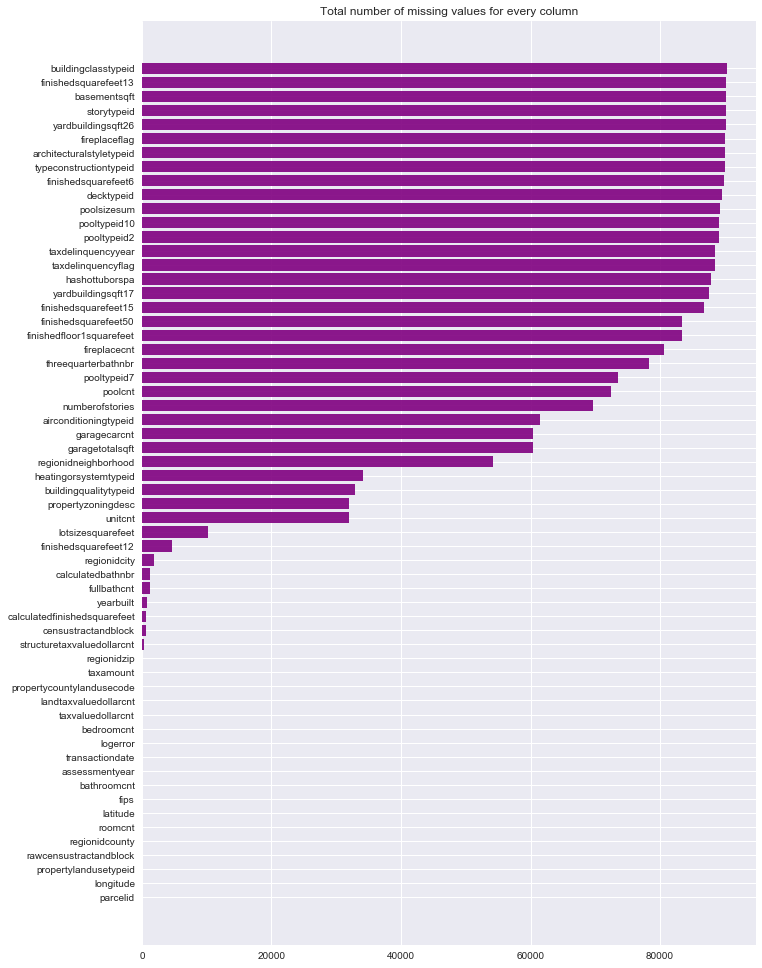

In [20]:
import matplotlib.pyplot as plot

missing_data = merged_train_data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['names', 'counts']
missing_data = missing_data.sort_values(by='counts')

fig, axes = plot.subplots(figsize=(11,17))
axes.barh(np.arange(missing_data.shape[0]), missing_data.counts.values, alpha=0.9,color='purple')
axes.set_title("Total number of missing values for every column")
axes.set_yticks(np.arange(missing_data.shape[0]))
axes.set_yticklabels(missing_data.names.values, rotation='horizontal')
plot.show()

We can see from the graph above, more than half of the features miss huge amount of data. We will deal with those missing values before we train the model later.

### Non Numerical Data

In [21]:
data_type = merged_train_data.dtypes.reset_index()
data_type.columns = ["Count", "Data Type"]
data_type.groupby("Data Type").aggregate('count').reset_index()


,Data Type,Count
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


In [22]:
data_type.loc[data_type['Data Type'] == 'object']


,Count,Data Type
24,hashottuborspa,object
34,propertycountylandusecode,object
36,propertyzoningdesc,object
51,fireplaceflag,object
57,taxdelinquencyflag,object


We found couple non numerical data entries. We will deal with those features later by using labelEncoder.

Let's explore transaction date to see how many months of data we have.

### Explore Transaction Date

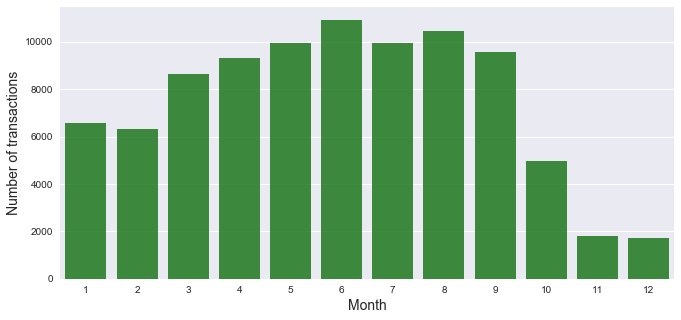

In [23]:
import numpy as np 
import matplotlib.pyplot as plot
import seaborn as sns

merged_train_data['transaction_month'] = merged_train_data['transactiondate'].dt.month
txn_month_count = merged_train_data['transaction_month'].value_counts()
plot.figure(figsize=(11,5))
sns.barplot(txn_month_count.index, txn_month_count.values, alpha=0.8, color='green')
plot.ylabel('Number of transactions', fontsize=14)
plot.xlabel('Month', fontsize=14)
plot.show()

We have good amount of data from Jan to Oct 2016. We have less transaction data from November and December 2016.

Since logerror is the targeted values in this project, let's explore it!

### Explore Logerror

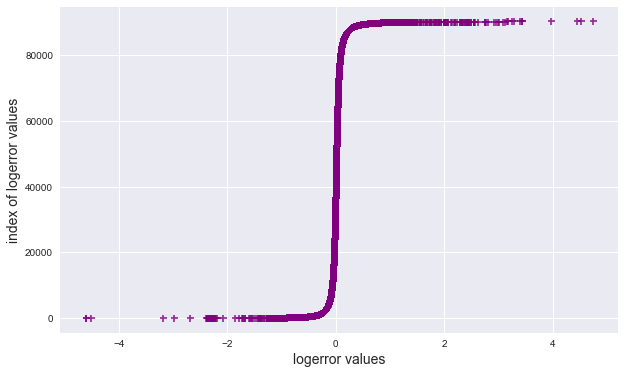

In [24]:
import numpy as np 
import matplotlib.pyplot as plot
import seaborn as sns

plot.figure(figsize=(10,6))
x, y = pd.Series(np.sort(merged_train_data.logerror.values), name="logerror values"), pd.Series(range(merged_train_data.shape[0]), name="index of logerror values")
sns.regplot(x=x, y=y, marker="+",fit_reg=False,color='purple')
plot.xlabel('logerror values', fontsize=14)
plot.ylabel('index of logerror values', fontsize=14)
plot.show()

We can see outliners in the graph above for log errors. Let's take our outliers and plot seaborn distribution plot.

### Logerror Distribution Analysis

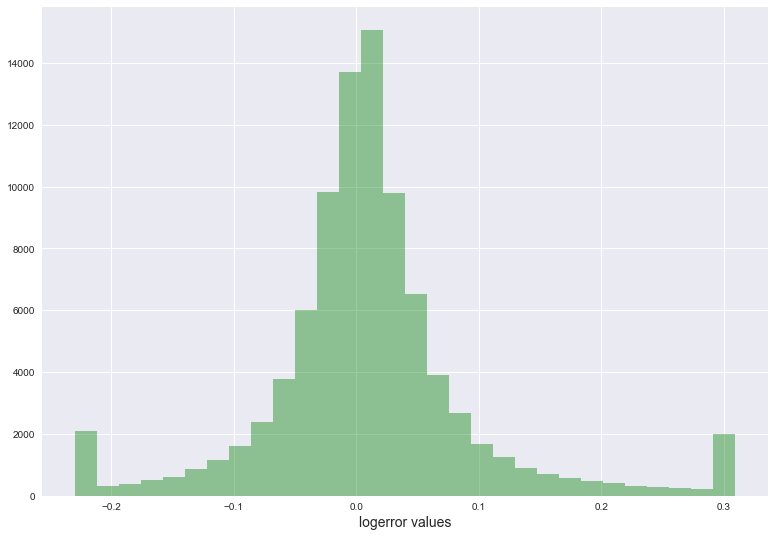

In [25]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
merged_train_data['logerror'].loc[merged_train_data['logerror']>np.percentile(merged_train_data.logerror.values, 98)] = np.percentile(merged_train_data.logerror.values, 98)
merged_train_data['logerror'].loc[merged_train_data['logerror']<np.percentile(merged_train_data.logerror.values, 2)] = np.percentile(merged_train_data.logerror.values, 2)

plot.figure(figsize=(13,9))
sns.distplot(merged_train_data.logerror.values,kde=False,color='green', bins=30)
plot.xlabel('logerror values', fontsize=14)
plot.show()

We can see from graph above, it is a very good normal distribution. Since logerror = log(Zestimate) - log(actual price), negative logerror value means Zestimate underestimated, positive value means Zestimate overestimated. We can see from this normal distribution, it estimates pretty accurate most of the time. We need to find out when Zesimate does well and when it doesn't. We need to find out correlations between different features and logerror. 

### Correlation between logerror and features

As we discussed above, we know there are some NaN values in the dataframe. I am going to fill it with mean values before doing correlation analysis.

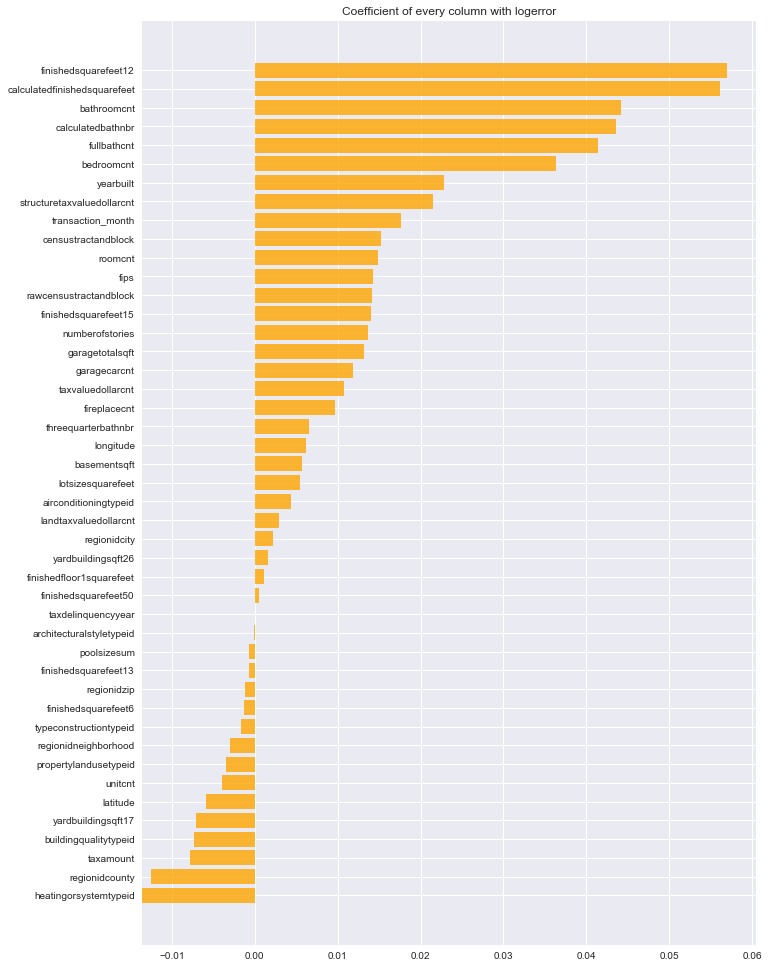

In [26]:
merged_data_means = merged_train_data.mean(axis=0)
merged_train_data_new = merged_train_data.fillna(merged_data_means)
merged_train_data_new = merged_train_data_new.drop(["parcelid", "transactiondate"], axis=1)
columns = [col for col in merged_train_data_new.columns 
           if merged_train_data_new[col].dtype!='object' 
           if len(merged_train_data_new[col].unique())!=1 
           if col not in ['logerror'] ]
lbls = [] 
vals = []
for column in columns:
    lbls.append(column)
    vals.append(np.corrcoef(merged_train_data_new[column].values, merged_train_data_new.logerror.values)[0,1])

correlation_data = pd.DataFrame({'lbls':lbls, 'vals':vals})
correlation_data = correlation_data.sort_values(by='vals')
fig, axes = plot.subplots(figsize=(11,17))
axes.barh(np.arange(correlation_data.shape[0]), correlation_data.vals.values, alpha=0.8,color='orange')
axes.set_title("Coefficient of every column with logerror")
axes.set_yticks(np.arange(correlation_data.shape[0]))
axes.set_yticklabels(correlation_data.lbls.values, rotation='horizontal')
plot.show()


From data visualization above, we found out some important features correlated to logerror. Let's pick up one of them to further examine it.

#### First, let's visualize Calculated Finished Square Feet.

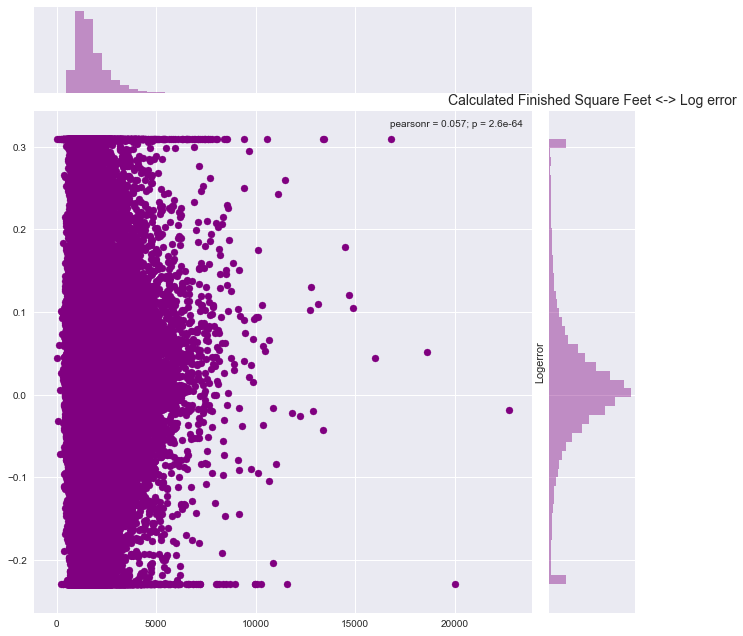

In [27]:
plot.figure(figsize=(11,11))
sns.jointplot(x=merged_train_data.calculatedfinishedsquarefeet.values, y=merged_train_data.logerror.values, size=9, color='purple')
plot.ylabel('Logerror', fontsize=11)
plot.title("Calculated Finished Square Feet <-> Log error", fontsize=14)
plot.show()

You can see from the graph above (Ignore the outliers), as the size of Calculated Finished Square Feet increases, logerror decreases. That means Zestimate estimates well for bigger size houses. 

#### Then, let's visualize Finished Square Feet12

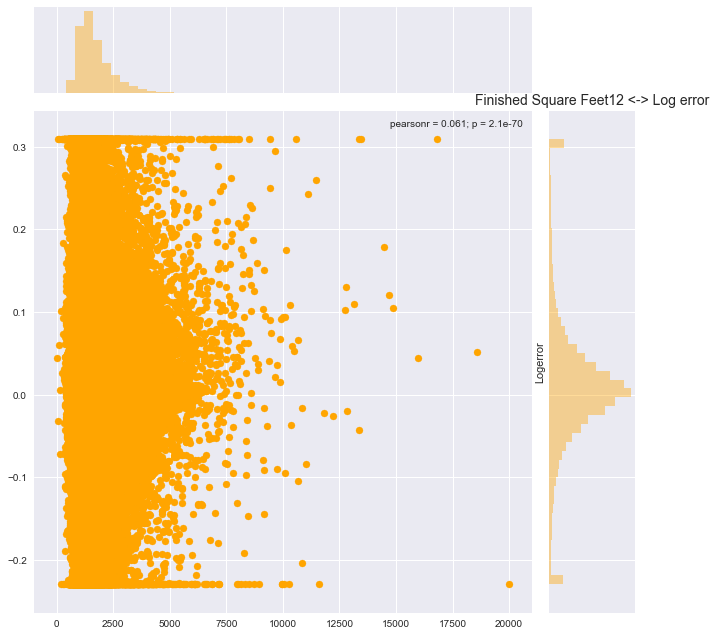

In [28]:
plot.figure(figsize=(11,11))
sns.jointplot(x=merged_train_data.finishedsquarefeet12.values, y=merged_train_data.logerror.values, size=9, color='orange')
plot.ylabel('Logerror', fontsize=11)
plot.title("Finished Square Feet12 <-> Log error", fontsize=14)
plot.show()

You can see from the graph above (Ignore the outliers), as the size of Finished Square Feet12 increases, logerror decreases. That means Zestimate estimates well for bigger size houses. 

#### Let's pick up another one to analyze - calculatedbathnbr.

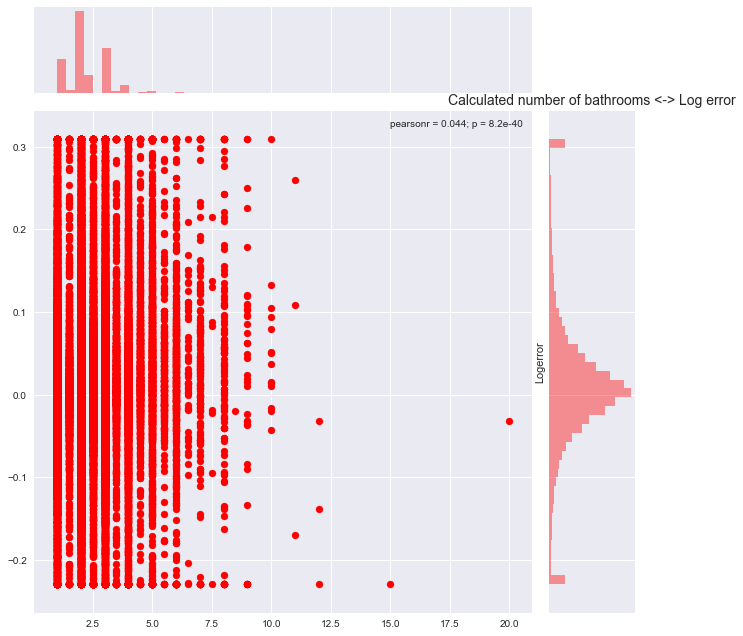

In [29]:
plot.figure(figsize=(11,11))
sns.jointplot(x=merged_train_data.calculatedbathnbr.values, y=merged_train_data.logerror.values, size=9, color='red')
plot.ylabel('Logerror', fontsize=11)
plot.title("Calculated number of bathrooms <-> Log error", fontsize=14)
plot.show()

You can see from the graph above (Ignore the outliers), as the size of Calculated number of bathrooms increases, logerror decreases a little bit. This one is not as strong correlated as the previous one.

In summary,
finishedsquarefeet12,calculatedfinishedsquarefeet,bathroomcnt,calculatedbathnbr,fullbathcnt,
bedroomcnt,censustractandblock,transaction_month, structuretaxvaluedollarcnt,yearbuilt are top 10 correlated features 

## Feature Selection

### Feature Importance

/Users/macbookpro/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


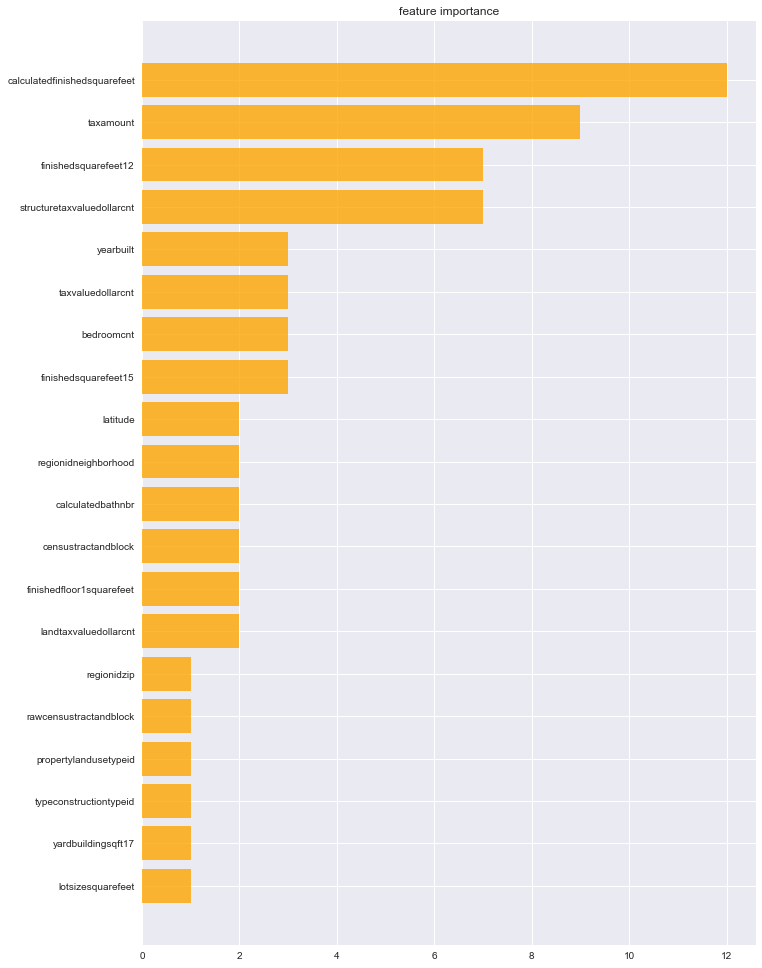

In [30]:
from sklearn import preprocessing
import xgboost as xgb

feature_Importance_data = merged_train_data
merged_data_means = merged_train_data.mean(axis=0)
feature_Importance_data = feature_Importance_data.fillna(merged_data_means)
feature_Importance_data = feature_Importance_data.fillna(-999.0)

#use LabelEncoder to deal with non numerical data 
for feature in feature_Importance_data.columns:
    if feature_Importance_data[feature].dtype=='object':
        label = preprocessing.LabelEncoder()
        label.fit(list(feature_Importance_data[feature].values)) 
        feature_Importance_data[feature] = label.transform(list(feature_Importance_data[feature].values))
        
y = feature_Importance_data.logerror.values
X = feature_Importance_data.drop(["parcelid", "transactiondate", "logerror"], axis=1)
params = {'eta': 0.05,'max_depth': 3,'subsample': 0.4,'colsample_bytree': 0.4,'objective': 'reg:linear','eval_metric': 'mae',
'silent': 1}
plst = params.items()
dtrain = xgb.DMatrix(X, y, feature_names=X.columns.values, missing=-999.0)
xgb1 = xgb.train(plst, dtrain, num_boost_round=10)

feaImport = xgb1.get_fscore()
feas = pd.DataFrame()
feas['features'] = feaImport.keys()
feas['importance'] = feaImport.values()

#display feature importance graph
feas = feas.sort_values(by='importance')
fig, axes = plot.subplots(figsize=(11,17))
axes.barh(np.arange(feas.shape[0]), feas.importance.values, alpha=0.8,color='orange')
axes.set_title("feature importance")
axes.set_yticks(np.arange(feas.shape[0]))
axes.set_yticklabels(feas.features.values, rotation='horizontal')
plot.show()


After I run the model for feature importance, I got some of the most important features. This result can be combined with the result I got from feature coefficient analysis to help me to do feature selection for traning the model.

## Evaluation Metrics

This model will be evaluated on Mean Absolute Error between the predicted log error and the actual log error. The log error is defined as logerror=log(Zestimate)−log(SalePrice)

## Benchmark Model

During my research, I found this lightgbm starter model which gave a pretty good MAE. I am using it as my benchmark model. I will build my model and tune the model based on this one. You can find all the code here:
https://www.kaggle.com/guolinke/simple-lightgbm-starter-lb-0-06487

### Fill Out Missing Values

Let's fill out the missing values before run base model

In [31]:
merged_data_means = merged_train_data.mean(axis=0)
merged_train_data = merged_train_data.fillna(merged_data_means)
merged_train_data = merged_train_data.fillna(-999.0)
merged_train_data.head(1)
#merged_data_means

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transaction_month
0,11016594,0.028,2016-01-01,1.0,7.23,713.581,2.0,3.0,4.0,4.0,...,-999,122754.0,360170.0,2015.0,237416.0,6735.88,-999,13.403,6.037e+13,1


### Deal With Non Numerical Values

Let's deal with non numerical data before run base model

In [32]:
#use LabelEncoder to deal with non numerical data 
for feature in merged_train_data.columns:
    if merged_train_data[feature].dtype=='object':
        label = preprocessing.LabelEncoder()
        label.fit(list(merged_train_data[feature].values)) 
        merged_train_data[feature] = label.transform(list(merged_train_data[feature].values))
merged_train_data.head(1)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transaction_month
0,11016594,0.028,2016-01-01,1.0,7.23,713.581,2.0,3.0,4.0,4.0,...,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,13.403,6.037e+13,1


In [33]:
merged_train_data['transactiondate'] = pd.to_datetime(merged_train_data['transactiondate'])  
mask = (merged_train_data['transactiondate'] > '2016-12-01') & (merged_train_data['transactiondate'] <= '2016-12-30')
data = merged_train_data.loc[mask]
data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transaction_month
3421,13923841,0.009,2016-12-28,13.000,7.23,713.581,2.5,2.0,4.0,5.565,...,0,128318.0,3.553e+05,2015.0,227016.0,4382.96,0,13.403,6.059e+13,12
10829,10736972,-0.037,2016-12-14,1.000,7.23,713.581,4.0,6.0,4.0,4.000,...,0,278410.0,3.524e+05,2015.0,74031.0,4415.55,0,13.403,6.038e+13,12
10941,11663348,0.075,2016-12-05,1.000,7.23,713.581,3.0,3.0,4.0,1.000,...,0,345355.0,1.148e+06,2015.0,802857.0,13961.06,0,13.403,6.037e+13,12
12731,11913710,0.162,2016-12-13,1.816,7.23,713.581,4.0,5.0,4.0,4.000,...,0,272354.0,6.975e+05,2015.0,425141.0,9522.84,0,13.403,6.037e+13,12
14707,11061551,0.042,2016-12-20,1.000,7.23,713.581,2.0,3.0,4.0,4.000,...,0,142831.0,2.236e+05,2015.0,80771.0,2932.39,0,13.403,6.037e+13,12


### Run Benchmark base Model

During my research, I found this lightgbm starter model which gave a pretty good MAE. I am using it as my benchmark model. I will build my model and tune the model based on this one. You can find all the code here:
https://www.kaggle.com/guolinke/simple-lightgbm-starter-lb-0-06487

In [34]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import gc
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

dftrain = merged_train_data
xtrain = dftrain.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
ytrain = dftrain['logerror'].values

del dftrain; gc.collect()

split = 90000
xtrain, ytrain, xvalid, yvalid = xtrain[:split], ytrain[:split], xtrain[split:], ytrain[split:]
print('train shape: {}\ncross validate Shape : {}'.format(xtrain.shape, xvalid.shape))
dtrain = lgb.Dataset(xtrain, label=ytrain)
dvalid = lgb.Dataset(xvalid, label=yvalid)

ps = {}
ps['min_data'] = 500
ps['objective'] = 'regression'
ps['learning_rate'] = 0.002
ps['min_hessian'] = 1
ps['sub_feature'] = 0.5
ps['boosting_type'] = 'gbdt'
ps['num_leaves'] = 60
ps['metric'] = 'mae'

print( "\nTraining LightGBM Base Model...")

base = lgb.train(ps, dtrain, 700, [dvalid])
del dtrain, dvalid; gc.collect()
del xtrain, xvalid; gc.collect()

train shape: (90000, 56)
cross validate Shape : (275, 56)

Training LightGBM Base Model...
[1]	valid_0's l1: 0.0637979
[2]	valid_0's l1: 0.063796
[3]	valid_0's l1: 0.0637943
[4]	valid_0's l1: 0.0637931
[5]	valid_0's l1: 0.0637903
[6]	valid_0's l1: 0.0637876
[7]	valid_0's l1: 0.0637882
[8]	valid_0's l1: 0.0637869
[9]	valid_0's l1: 0.0637851
[10]	valid_0's l1: 0.0637846
[11]	valid_0's l1: 0.0637839
[12]	valid_0's l1: 0.0637819
[13]	valid_0's l1: 0.0637786
[14]	valid_0's l1: 0.0637772
[15]	valid_0's l1: 0.0637759
[16]	valid_0's l1: 0.0637728
[17]	valid_0's l1: 0.0637705
[18]	valid_0's l1: 0.0637683
[19]	valid_0's l1: 0.0637663
[20]	valid_0's l1: 0.0637632
[21]	valid_0's l1: 0.0637623
[22]	valid_0's l1: 0.063761
[23]	valid_0's l1: 0.0637593
[24]	valid_0's l1: 0.0637569
[25]	valid_0's l1: 0.0637566
[26]	valid_0's l1: 0.0637551
[27]	valid_0's l1: 0.0637565
[28]	valid_0's l1: 0.0637531
[29]	valid_0's l1: 0.0637513
[30]	valid_0's l1: 0.0637507
[31]	valid_0's l1: 0.0637504
[32]	valid_0's l1: 0.

0

### MAE for base model

#### Read test data

In [35]:
data_2017 = pd.read_csv('dataset/train_2017.csv', parse_dates=["transactiondate"])
properties_2017 = pd.read_csv('dataset/properties_2017.csv',low_memory=False)
merged_data_2017 = pd.merge(data_2017,properties_2017,on="parcelid",how="left")
print('merged_data_2017: {}\n'.format(merged_data_2017.shape))
merged_data_2017_means = merged_data_2017.mean(axis=0)
merged_data_2017 = merged_data_2017.fillna(merged_data_2017_means)
merged_data_2017 = merged_data_2017.fillna(-999.0)
for feature in merged_data_2017.columns:
    if merged_data_2017[feature].dtype=='object':
        label = preprocessing.LabelEncoder()
        label.fit(list(merged_data_2017[feature].values)) 
        merged_data_2017[feature] = label.transform(list(merged_data_2017[feature].values))

merged_data_2017: (77613, 60)



#### Prepare test data

In [36]:
xtest = merged_data_2017
ytest = xtest['logerror'].values
xtest = xtest.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)

#### Predict and get MAE

In [37]:
base_pred = base.predict(xtest)
mean_absolute_error(ytest,base_pred)

0.06966635641135703

So MAE for base model is 0.06966. Although it's said that MAE (https://www.kaggle.com/guolinke/simple-lightgbm-starter-lb-0-06487) is 0.06487, I run it and got 0.06966. It probably uses different training and testing data set. I asked questions on the platform. Nobody responseded yet. I will use this score - 0.06966 as benchmark and tune based on this score.

## Implementation of LightGBM

In [38]:
#Try Cross validate with 80000, 70000, and 75000 split
#Try tune learnign rate and num leves
# 90000 -> 0.06962
# 80000 -> 0.06960
# 70000 -> 0.06961  
# 79000 -> 0.06960
# 75000 -> 0.0695919

# learning_rate = 0.001 -> 0.069584
# ps['num_leaves'] = 70  ->  0.06957
# ps['num_leaves'] = 200 -> 0.0695692
#Take out 'taxdelinquencyyear'-> 0.06950
import numpy as np
import pandas as pd
import lightgbm as lgb
import gc
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

dftrain = merged_train_data
xtrain = dftrain.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode','taxdelinquencyyear'], axis=1)
ytrain = dftrain['logerror'].values

del dftrain; gc.collect()

split = 75000
xtrain, ytrain, xvalid, yvalid = xtrain[:split], ytrain[:split], xtrain[split:], ytrain[split:]
print('train shape: {}\ncross validate Shape : {}'.format(xtrain.shape, xvalid.shape))
dtrain = lgb.Dataset(xtrain, label=ytrain)
dvalid = lgb.Dataset(xvalid, label=yvalid)

ps = {}
ps['min_data'] = 500
ps['objective'] = 'regression'
ps['learning_rate'] = 0.001
ps['min_hessian'] = 1
ps['sub_feature'] = 0.5
ps['boosting_type'] = 'gbdt'
ps['num_leaves'] = 200
ps['metric'] = 'mae'

print( "\nTraining LightGBM ...")

lgb_model = lgb.train(ps, dtrain, 700, [dvalid])
del dtrain, dvalid; gc.collect()
del xtrain, xvalid; gc.collect()

train shape: (75000, 55)
cross validate Shape : (15275, 55)

Training LightGBM ...
[1]	valid_0's l1: 0.0550381
[2]	valid_0's l1: 0.0550371
[3]	valid_0's l1: 0.0550365
[4]	valid_0's l1: 0.0550352
[5]	valid_0's l1: 0.0550341
[6]	valid_0's l1: 0.0550332
[7]	valid_0's l1: 0.0550323
[8]	valid_0's l1: 0.0550314
[9]	valid_0's l1: 0.0550303
[10]	valid_0's l1: 0.0550294
[11]	valid_0's l1: 0.0550283
[12]	valid_0's l1: 0.0550275
[13]	valid_0's l1: 0.0550264
[14]	valid_0's l1: 0.0550256
[15]	valid_0's l1: 0.0550243
[16]	valid_0's l1: 0.0550233
[17]	valid_0's l1: 0.0550227
[18]	valid_0's l1: 0.0550218
[19]	valid_0's l1: 0.055021
[20]	valid_0's l1: 0.0550197
[21]	valid_0's l1: 0.0550188
[22]	valid_0's l1: 0.0550177
[23]	valid_0's l1: 0.0550169
[24]	valid_0's l1: 0.0550158
[25]	valid_0's l1: 0.0550148
[26]	valid_0's l1: 0.0550138
[27]	valid_0's l1: 0.0550127
[28]	valid_0's l1: 0.0550116
[29]	valid_0's l1: 0.0550105
[30]	valid_0's l1: 0.0550097
[31]	valid_0's l1: 0.0550086
[32]	valid_0's l1: 0.0550074

0

In [39]:
#Predict and get MAE
lgb_pred = lgb_model.predict(xtest)
mean_absolute_error(ytest, lgb_pred)

0.069504264423146098

After tuning, MAE improves from 0.06966 to 0.06950

## Implementation of XGBoosting 

In [40]:
#Implementation and Tuning
# Xgb Tuning
# 0.069794492038748074
# max depth 6->8
# 0.069945733399468635

# Max depth 6->5  5->4 worse
# 0.069713735740486213

# Boosting round
# 150->180
# 0.069627739666462143

# 180->200
# Worse

# 180-190
# Worse

# 180-170
# 0.069625408699950306

# 170-160
# 0.069623370406690657

import xgboost as xgb
df_train_xgb = merged_train_data

x_train_xgb = df_train_xgb.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
                         'propertycountylandusecode','transaction_month'], axis=1)
y_train_xgb = df_train_xgb['logerror'].values
y_mean = y_train_xgb.mean(axis=0)
d_train_xgb = xgb.DMatrix(x_train_xgb, y_train_xgb)
xgb_ps = {
    'eta': 0.037,
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'max_depth': 5,
    'subsample': 0.90,
    'objective': 'reg:linear',
    'base_score': y_mean,
    'silent': 1
}
num_boost_rounds = 160

print( "\nTraining XGBoost ...")
xgb_model = xgb.train(dict(xgb_ps, silent=1), d_train_xgb, num_boost_round=num_boost_rounds)


Training XGBoost ...


In [41]:
#Predict and get MAE
dtest = xgb.DMatrix(xtest)
xgb_pred = xgb_model.predict(dtest)
mean_absolute_error(ytest, xgb_pred)


0.069623370406690657

## Combination of LightGBM and XGBoosting

In [42]:
# combine predictions
# Tune parameters
# xgb weight 
# 0.7-> 0.069450182166087379
# 0.6-> 0.069417796474496932
# 0.5-> 0.069398307261481038
# 0.4-> 0.069392950842295825
# 0.3-> 0.069400589405391733
# 0.2-> 0.069421154987728981

XGB_WEIGHT = 0.4000
print( "\nCombine xgb and lgb predicitons ..." )
lgb_weight = 1 - XGB_WEIGHT
comb_pred = XGB_WEIGHT*xgb_pred + lgb_weight*lgb_pred

mean_absolute_error(ytest,comb_pred)



Combine xgb and lgb predicitons ...


0.069392950842295825

## Model Validation

### Test with 2 different test dataset

In [43]:
#prepare two different test datasets
#2017 Jan to March
#2017 April to June
#2017 July to Sep
xtest_201701to03 = merged_data_2017
xtest_201701to03 = xtest_201701to03[(xtest_201701to03['transactiondate'] >= '2017-01-01') & (xtest_201701to03['transactiondate'] <= '2017-03-31')]
ytest_201701to03 = xtest_201701to03['logerror'].values
xtest_201701to03 = xtest_201701to03.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)


xtest_201704to06 = merged_data_2017
xtest_201704to06 = xtest_201704to06[(xtest_201704to06['transactiondate'] >= '2017-04-01') & (xtest_201704to06['transactiondate'] <= '2017-06-30')]
ytest_201704to06 = xtest_201704to06['logerror'].values
xtest_201704to06 = xtest_201704to06.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)


xtest_201707to09 = merged_data_2017
xtest_201707to09 = xtest_201707to09[(xtest_201707to09['transactiondate'] >= '2017-07-01') & (xtest_201707to09['transactiondate'] <= '2017-09-30')]
ytest_201707to09 = xtest_201707to09['logerror'].values
xtest_201707to09 = xtest_201707to09.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)




In [44]:
#MAE for 2017 01-03
d_train_xgb_2017_1 = xgb.DMatrix(xtest_201701to03, ytest_201701to03)
pred_201701to03 = 0.4*xgb_model.predict(d_train_xgb_2017_1) + 0.6*lgb_model.predict(xtest_201701to03)
mean_absolute_error(ytest_201701to03, pred_201701to03)

0.070981147916974754

In [45]:
#MAE for 2017 04-06
d_train_xgb_2017_2 = xgb.DMatrix(xtest_201704to06, ytest_201704to06)
pred_201704to06 = 0.4*xgb_model.predict(d_train_xgb_2017_2) + 0.6*lgb_model.predict(xtest_201704to06)
mean_absolute_error(ytest_201704to06, pred_201704to06)

0.068343168670591578

In [46]:
#MAE for 2017 07-09
d_train_xgb_2017_3 = xgb.DMatrix(xtest_201707to09, ytest_201707to09)
pred_201707to09 = 0.4*xgb_model.predict(d_train_xgb_2017_3) + 0.6*lgb_model.predict(xtest_201707to09)
mean_absolute_error(ytest_201707to09, pred_201707to09)

0.069227544950271933

We can see from those results, the final model performed pretty consistent regardless of test dataset changes. 

## Conclusion

MAE for lightGBM Base model is 0.06966. MAE for Improved lightGBM is 0.06950. MAE for XGBoosting is 0.06962. MAE for all the models combined is 0.06939. Combined model gets the highest sore among all the models. The combined model is the final model that I choose for this problem: 0.4*xgb_model.predict(xtest) + 0.6*lgb_model.predict(xtest)

## References
Some ideas are inspired from those kernel discussions on Kaggle. Thanks for all their work!!
https://www.kaggle.com/c/zillow-prize-1/kernels
https://www.kaggle.com/philippsp/exploratory-analysis-zillow
https://www.kaggle.com/viveksrinivasan/zillow-eda-on-missing-values-multicollinearity
https://www.kaggle.com/aharless/xgboost-lightgbm-and-ols
https://www.kaggle.com/guolinke/simple-lightgbm-starter-lb-0-06487
https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
https://datascience.stackexchange.com/questions/18903/lightgbm-vs-xgboost
https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
https://lightgbm.readthedocs.io/en/latest/
https://xgboost.readthedocs.io/en/latest/
